In [1]:
# Independencies
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import zipfile
from os import listdir
from os.path import isfile, join
import warnings
import plotly as px
# import geopandas as gdp
import plotly.graph_objects as go

warnings.filterwarnings("ignore")

In [10]:
# Color mapping

color_Poten_df = {'parking': 'blue', 
                  'fuel': 'red'}

color_Inter_df = {'restaurant': 'blue', 
                  'supermarket': 'red', 
                  'school': 'yellow'}

color_Charg_df = {'Slow': 'blue', 
                  'Fast': 'red', 
                  'Rapid': 'yellow'}

color_total_df = {'parking': 'blue', 
                  'fuel': 'blue', 
                  'restaurant': 'blue',
                  'supermarket': 'blue', 
                  'school': 'blue', 
                  'Slow': 'red', 
                  'Fast': 'green', 
                  'Rapid': 'orange'}

color_Solutions = {'fast': 'blue','rapid': 'red'}

In [3]:
def importing_df():

    path_data = Path('Project_data.zip')
    path_repo = Path('FullMarksForMMCS')

    with zipfile.ZipFile(path_data, 'r') as zip_ref:
        zip_ref.extractall(path_repo)

    path_unzip = Path('Project_data')
    Excel_names = [f for f in listdir(path_unzip) if isfile(join(path_unzip, f))]

    for name in Excel_names:
        df_name = f'{name[0:5]}_df'
        globals()[df_name] = pd.read_excel(os.path.abspath(f'Project_data/{name}'))
        
    Charg_df_re = Charg_df.rename(columns = {'Type': 'amenity'})
        
    return Poten_df, Deman_df, Inter_df, Charg_df_re

In [4]:
def merge_df():
    Charg_df = Charg_df_re.drop(columns = ['CP ID'])
    df_merge = pd.concat([Poten_df, Inter_df, Charg_df])
    
    return df_merge

In [5]:
Poten_df = importing_df()[0]
Inter_df = importing_df()[2]
Charg_df_re = importing_df()[3]
df_merge = merge_df()

In [29]:
def plotting_heatmap(df):
    
    df_sort = df.sort_values(by = ['amenity'])
    grid_wid = 14
    grid_len = 31
    pos_mat = np.zeros((14, 31))
    
    postion_vec = df['grid number']
    for i in postion_vec:
        position_tp = (i % 14 - 1, i // 14 - 1)
        pos_mat[position_tp] += 1
    
    fig, axes = plt.subplots(figsize = (26, 16))
    ax = sns.heatmap(pos_mat, cmap = "crest", annot = True)
    ax.invert_yaxis()
    fig.show()
    
def plotting_map(df, colormapping):
    df_sort = df.sort_values(by = ['amenity'])
    df_sort['color'] = df_sort['amenity'].map(colormapping)
    
    fig_map = go.Figure()
    for index, row in df_sort.iterrows():
        fig = fig_map.add_trace(go.Scattermapbox(
            lat = [row.Latitude],
            lon = [row.Longitude],
            mode = 'markers',
            marker = go.scattermapbox.Marker(
                size = 8 + row.numbers,
                color = row.color, # Could define color your self!!
                ),
            
    #         text = df['CP ID'],
        )
                   )
    
    fig.update_layout(mapbox_style = "open-street-map")

    fig.show()


In [27]:
df_sol = pd.read_csv("d3_80_map_plot.csv")
df_sol_fast = pd.read_csv("d3_80_fast.csv")
df_sol_rapid = pd.read_csv("d3_80_rapid.csv")

In [30]:
plotting_map(df_sol,color_Solutions)


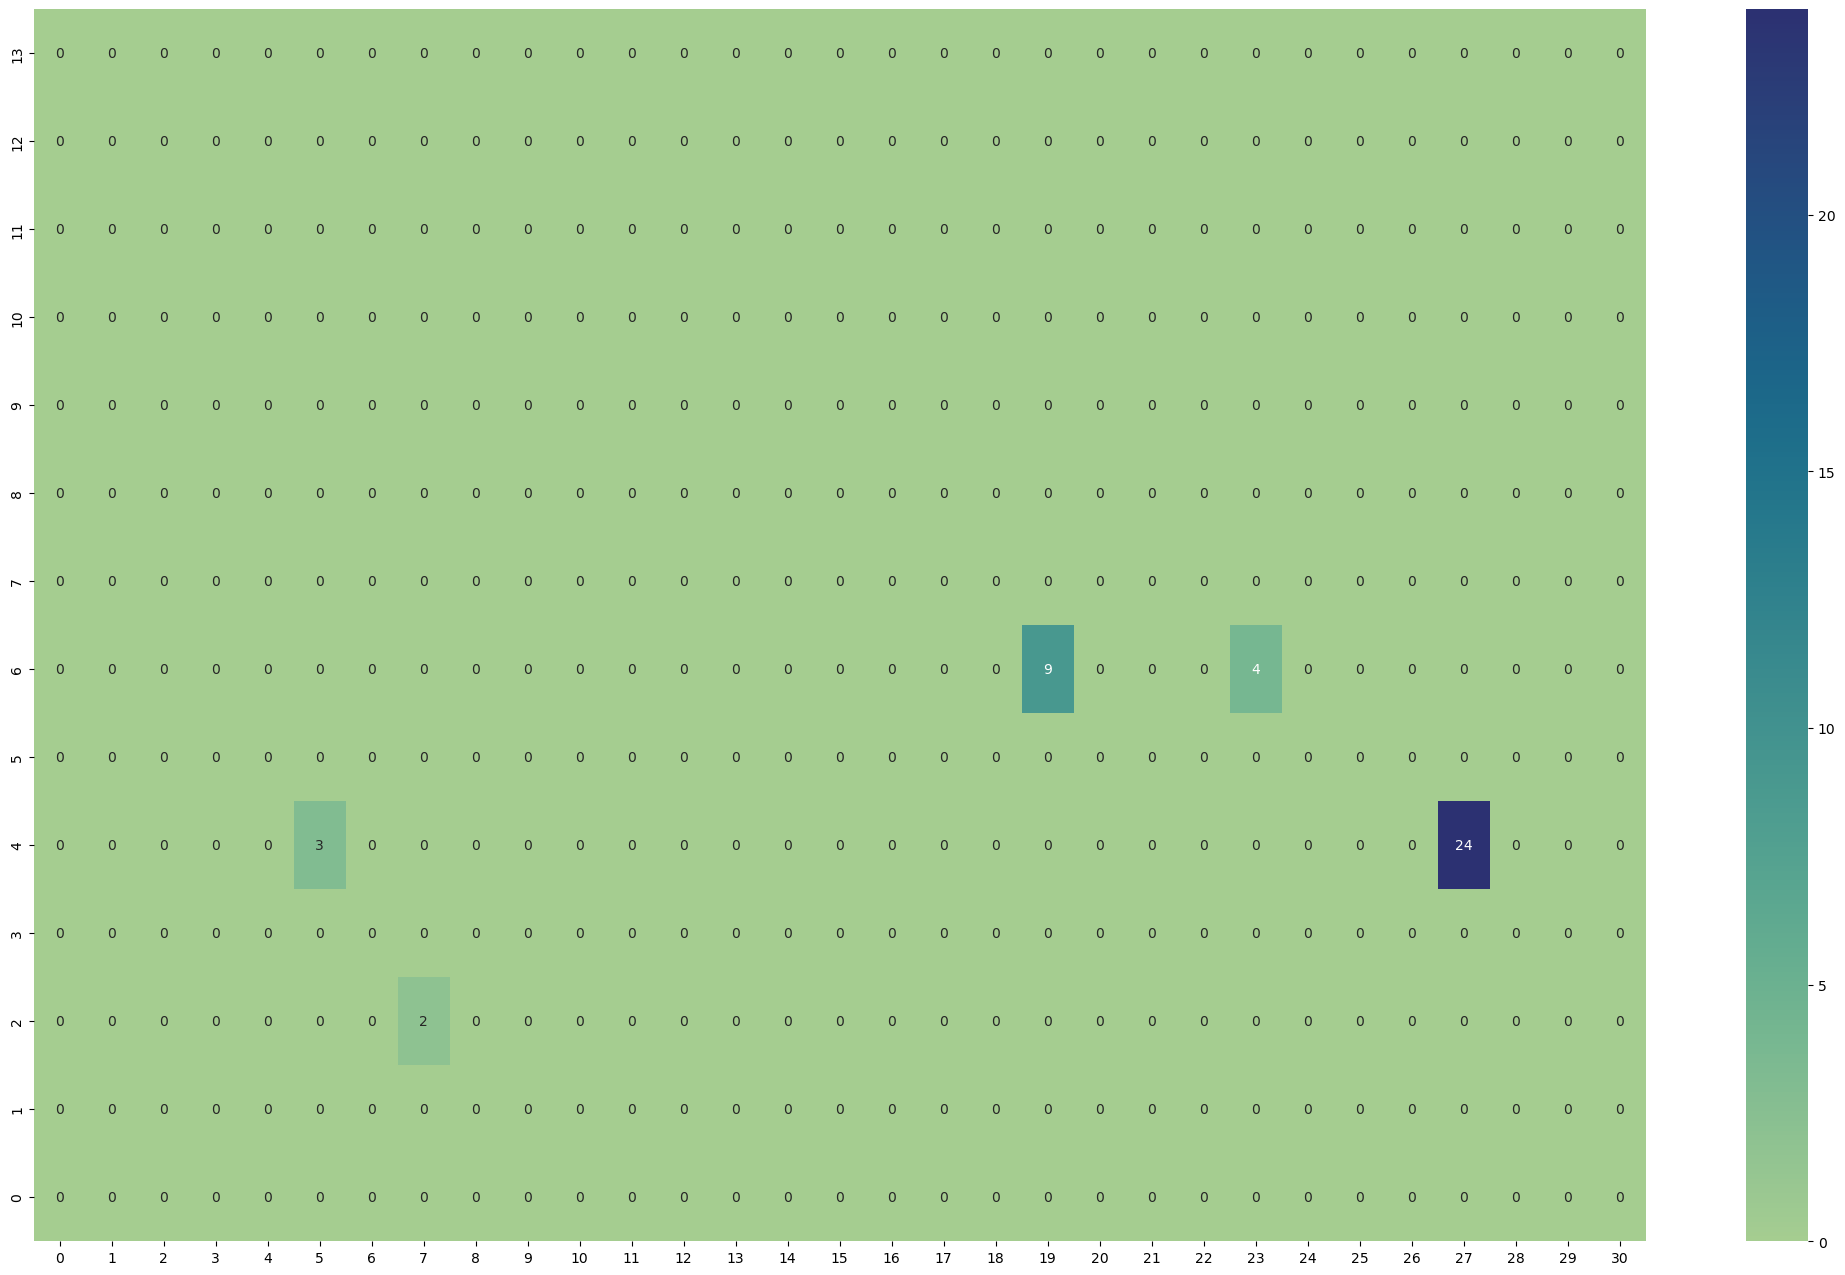

In [31]:
plotting_heatmap(df_sol_fast)

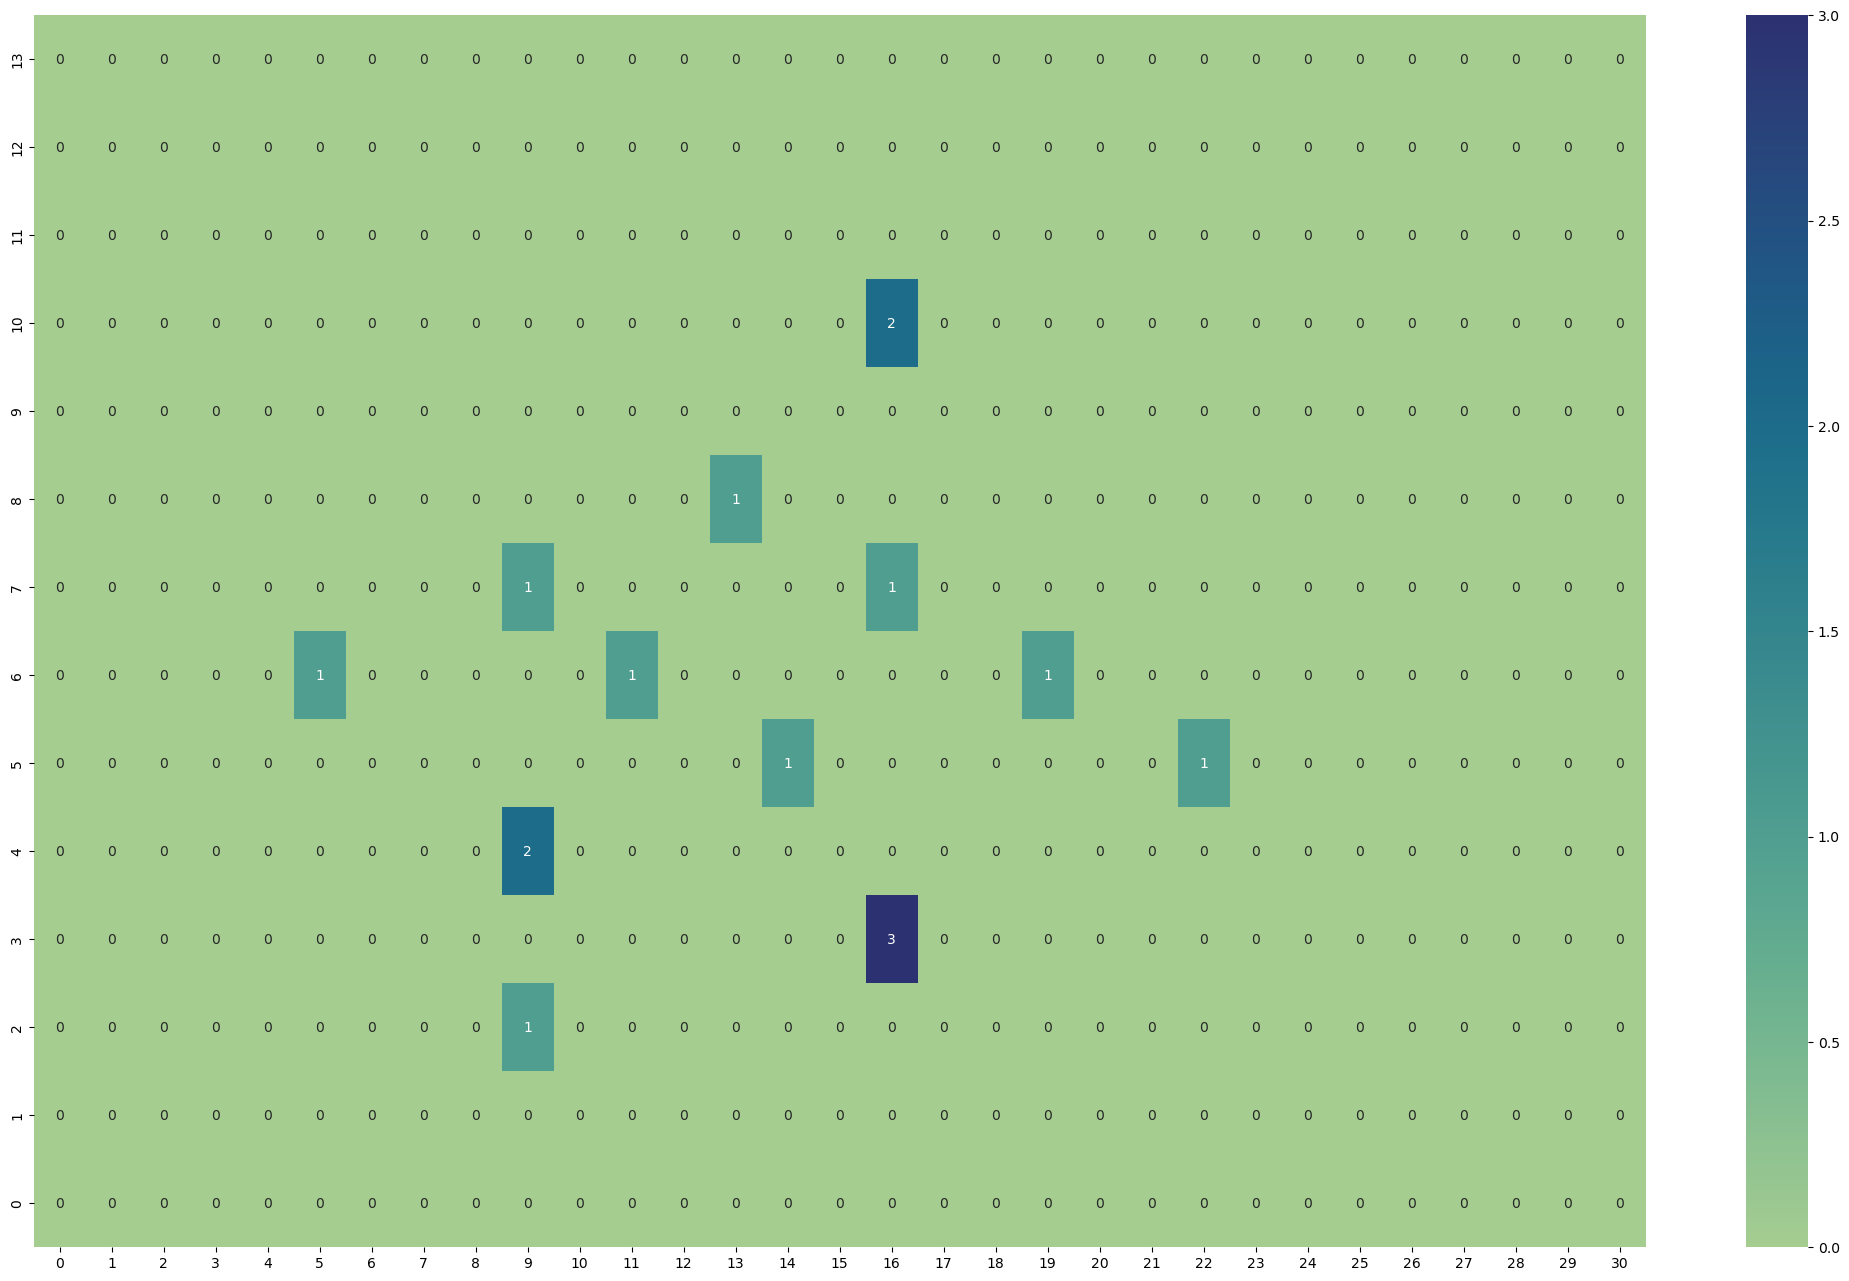

In [32]:
plotting_heatmap(df_sol_rapid)